In [2]:
import sagemaker

role = sagemaker.get_execution_role()
print(role)

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/sagemaker-user/.config/sagemaker/config.yaml
arn:aws:iam::530490169633:role/LabRole


In [3]:
import boto3

bucket_name = 'aai-540-data'

s3 = boto3.client('s3')

response = s3.list_objects_v2(Bucket=bucket_name, Delimiter='/')

print("Top-level folders in the bucket:")
for prefix in response.get('CommonPrefixes', []):
    print(prefix['Prefix'])

Top-level folders in the bucket:
annotations/
cct_resized/


In [4]:
import boto3

bucket_name = 'aai-540-data'
folders = ['annotations/', 'cct_resized/']

s3 = boto3.client('s3')

for folder in folders:
    print(f"\nContents of folder: {folder}")
    response = s3.list_objects_v2(Bucket=bucket_name, Prefix=folder)
    
    if 'Contents' in response:
        for obj in response['Contents']:
            print(obj['Key'])
    else:
        print("Folder is empty or you don't have permission.")


Contents of folder: annotations/
annotations/
annotations/cct_labels.json
annotations/grp4-metadata.json

Contents of folder: cct_resized/
cct_resized/5858bf2b-23d2-11e8-a6a3-ec086b02610b_0.jpg
cct_resized/5858bf2c-23d2-11e8-a6a3-ec086b02610b_0.jpg
cct_resized/5858bf33-23d2-11e8-a6a3-ec086b02610b_0.jpg
cct_resized/5858bf35-23d2-11e8-a6a3-ec086b02610b_0.jpg
cct_resized/5858bf4a-23d2-11e8-a6a3-ec086b02610b_0.jpg
cct_resized/5858bf4d-23d2-11e8-a6a3-ec086b02610b_0.jpg
cct_resized/5858bf5a-23d2-11e8-a6a3-ec086b02610b_0.jpg
cct_resized/5858bf5d-23d2-11e8-a6a3-ec086b02610b_0.jpg
cct_resized/5858bf67-23d2-11e8-a6a3-ec086b02610b_0.jpg
cct_resized/5858bf6a-23d2-11e8-a6a3-ec086b02610b_0.jpg
cct_resized/5858bf6d-23d2-11e8-a6a3-ec086b02610b_0.jpg
cct_resized/5858bf6f-23d2-11e8-a6a3-ec086b02610b_0.jpg
cct_resized/5858bf70-23d2-11e8-a6a3-ec086b02610b_0.jpg
cct_resized/5858bf75-23d2-11e8-a6a3-ec086b02610b_0.jpg
cct_resized/5858bf7c-23d2-11e8-a6a3-ec086b02610b_0.jpg
cct_resized/5858bf86-23d2-11e8-a6a3

In [5]:
import boto3
import json

bucket_name = 'aai-540-data'
key = 'annotations/cct_labels.json'

s3 = boto3.client('s3')
response = s3.get_object(Bucket=bucket_name, Key=key)
labels = json.load(response['Body'])

print(type(labels))
print(list(labels.keys())[:5]) 

<class 'dict'>
['5998cfa4-23d2-11e8-a6a3-ec086b02610b_0.jpg', '588a679f-23d2-11e8-a6a3-ec086b02610b_0.jpg', '593d68d7-23d2-11e8-a6a3-ec086b02610b_0.jpg', '59fae563-23d2-11e8-a6a3-ec086b02610b_0.jpg', '595f7b9c-23d2-11e8-a6a3-ec086b02610b_0.jpg']


In [6]:
key = 'annotations/grp4-metadata.json'

response = s3.get_object(Bucket=bucket_name, Key=key)
metadata = json.load(response['Body'])

print("Top-level keys in metadata:")
print(list(metadata.keys()))

Top-level keys in metadata:


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:7                                                                                    │
│                                                                                                  │
│   4 metadata = json.load(response['Body'])                                                       │
│   5                                                                                              │
│   6 print("Top-level keys in metadata:")                                                         │
│ ❱ 7 print(list(metadata.keys()))                                                                 │
│   8                                                                                              │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
AttributeError: 'list' object has no attribute 'keys'

In [7]:
print(type(metadata))  
print(f"Length: {len(metadata)}")

<class 'list'>
Length: 65112


In [8]:
print("\nSample entries:")
for item in metadata[:3]:
    print(json.dumps(item, indent=2)[:500])
    print('-' * 80)


Sample entries:
{
  "filename": "5998cfa4-23d2-11e8-a6a3-ec086b02610b_0.jpg",
  "label": "opossum",
  "category_id": 1,
  "bbox": [
    499.2,
    711.68,
    353.28,
    199.68
  ],
  "image_id": "5998cfa4-23d2-11e8-a6a3-ec086b02610b",
  "location": "33",
  "split_type": "train"
}
--------------------------------------------------------------------------------
{
  "filename": "588a679f-23d2-11e8-a6a3-ec086b02610b_0.jpg",
  "label": "opossum",
  "category_id": 1,
  "bbox": [
    985.6,
    783.36,
    368.64,
    230.4
  ],
  "image_id": "588a679f-23d2-11e8-a6a3-ec086b02610b",
  "location": "115",
  "split_type": "train"
}
--------------------------------------------------------------------------------
{
  "filename": "593d68d7-23d2-11e8-a6a3-ec086b02610b_0.jpg",
  "label": "squirrel",
  "category_id": 5,
  "bbox": [
    1779.2,
    407.04,
    61.44,
    84.48
  ],
  "image_id": "593d68d7-23d2-11e8-a6a3-ec086b02610b",
  "location": "90",
  "split_type": "train"
}
--------------------

In [9]:
from collections import Counter

split_types = [item['split_type'] for item in metadata]

split_counts = Counter(split_types)

print("Split type distribution:")
for split, count in split_counts.items():
    print(f"{split}: {count}")

Split type distribution:
train: 39361
val: 25751


In [10]:
import pandas as pd

df = pd.DataFrame(metadata)
df.head()

,filename,label,category_id,bbox,image_id,location,split_type
0,5998cfa4-23d2-11e8-a6a3-ec086b02610b_0.jpg,opossum,1,"[499.2, 711.68, 353.28, 199.68]",5998cfa4-23d2-11e8-a6a3-ec086b02610b,33,train
1,588a679f-23d2-11e8-a6a3-ec086b02610b_0.jpg,opossum,1,"[985.6, 783.36, 368.64, 230.4]",588a679f-23d2-11e8-a6a3-ec086b02610b,115,train
2,593d68d7-23d2-11e8-a6a3-ec086b02610b_0.jpg,squirrel,5,"[1779.2, 407.04, 61.44, 84.48]",593d68d7-23d2-11e8-a6a3-ec086b02610b,90,train
3,59fae563-23d2-11e8-a6a3-ec086b02610b_0.jpg,rabbit,10,"[1456.0, 480.0, 156.8, 137.6]",59fae563-23d2-11e8-a6a3-ec086b02610b,46,val
4,595f7b9c-23d2-11e8-a6a3-ec086b02610b_0.jpg,rodent,99,"[249.3516082764, 798.4633789062, 291.603164672...",595f7b9c-23d2-11e8-a6a3-ec086b02610b,67,val


In [11]:
print("Dataset shape:", df.shape)
print("\nData types and non-null counts:")
print(df.info())

print("\nMissing values:")
print(df.isnull().sum())

Dataset shape: (65112, 7)

Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65112 entries, 0 to 65111
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   filename     65112 non-null  object
 1   label        65112 non-null  object
 2   category_id  65112 non-null  int64 
 3   bbox         65112 non-null  object
 4   image_id     65112 non-null  object
 5   location     65112 non-null  object
 6   split_type   65112 non-null  object
dtypes: int64(1), object(6)
memory usage: 3.5+ MB
None

Missing values:
filename       0
label          0
category_id    0
bbox           0
image_id       0
location       0
split_type     0
dtype: int64


In [12]:
print("\nLabel distribution:")
print(df['label'].value_counts())


Label distribution:
label
opossum          12134
raccoon           7908
coyote            6505
deer              6428
rabbit            6025
bobcat            5048
cat               4391
bird              4026
dog               2860
squirrel          2648
car               2557
rodent            1842
skunk             1198
fox               1099
empty              186
lizard             177
mountain_lion       44
badger              28
insect               7
bat                  1
Name: count, dtype: int64


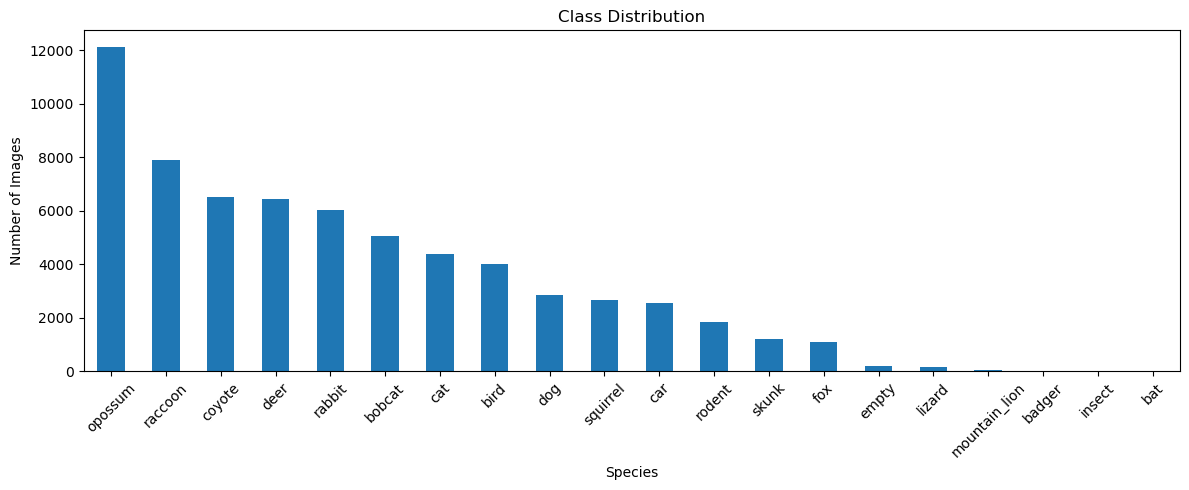

In [13]:
import matplotlib.pyplot as plt

df['label'].value_counts().plot(kind='bar', figsize=(12, 5), title="Class Distribution")
plt.xlabel("Species")
plt.ylabel("Number of Images")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

label       badger  bat  bird  bobcat   car   cat  coyote  deer   dog  empty  \
split_type                                                                     
train           10    1  2735    2204  1491  2999    4212  3411  1850    163   
val             18    0  1291    2844  1066  1392    2293  3017  1010     23   

label       fox  insect  lizard  mountain_lion  opossum  rabbit  raccoon  \
split_type                                                                 
train       671       7      54             44     7162    5272     3076   
val         428       0     123              0     4972     753     4832   

label       rodent  skunk  squirrel  
split_type                           
train         1418    729      1852  
val            424    469       796  


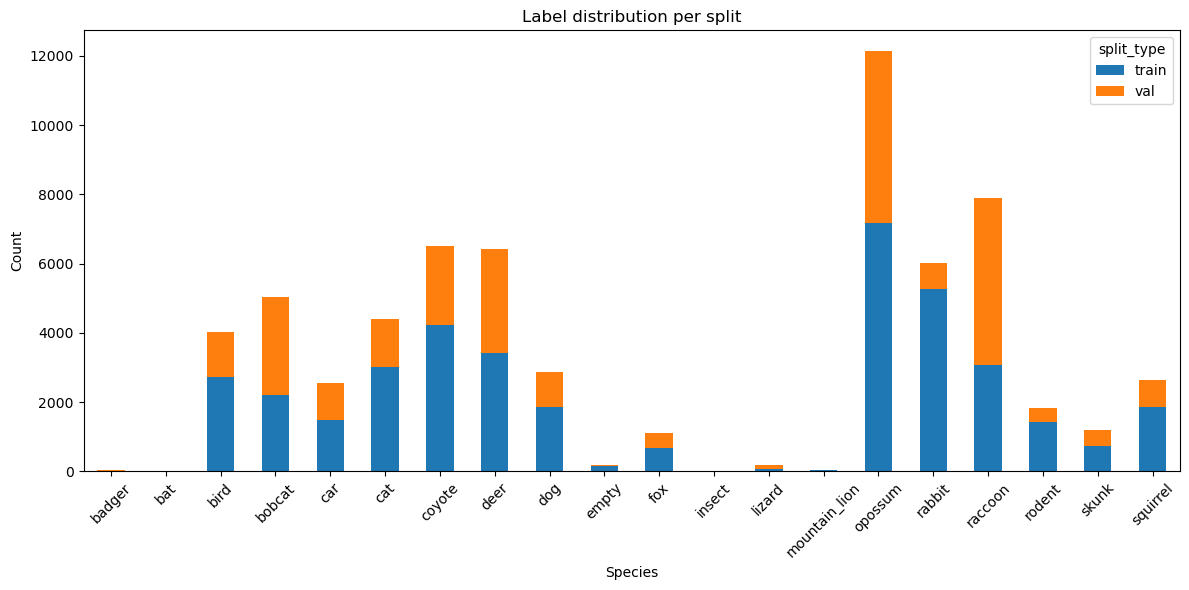

In [14]:
split_label_counts = df.groupby(['split_type', 'label']).size().unstack(fill_value=0)
print(split_label_counts)

split_label_counts.T.plot(kind='bar', stacked=True, figsize=(12, 6), title='Label distribution per split')
plt.xlabel("Species")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

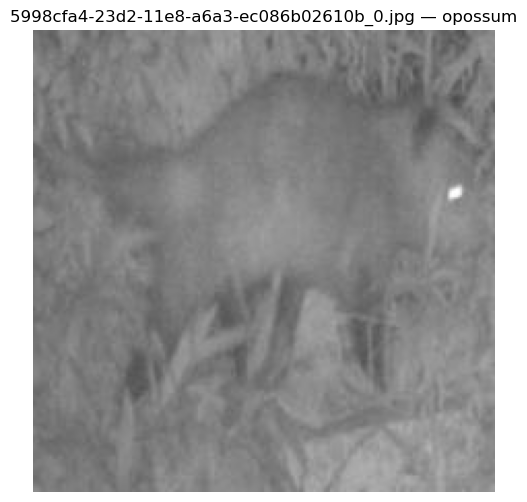

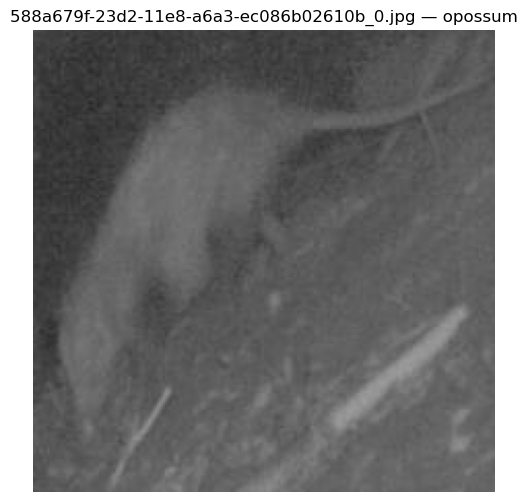

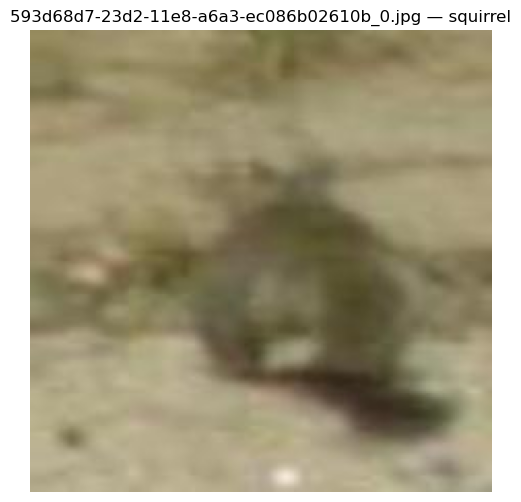

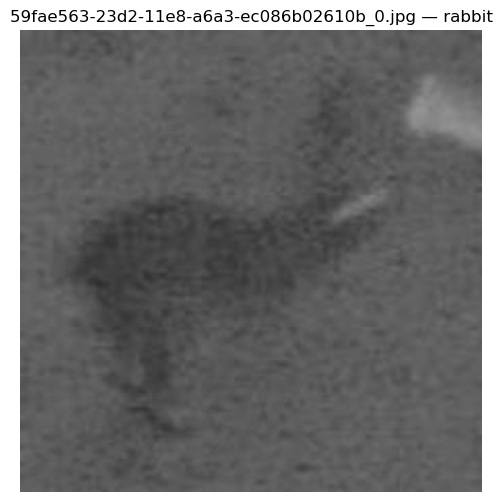

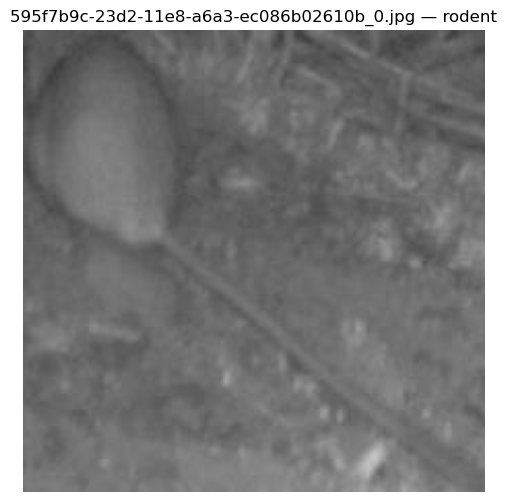

In [15]:
from PIL import Image, ImageDraw
from io import BytesIO

bucket_name = 'aai-540-data'
s3 = boto3.client('s3')

num_images = 5
sample_data = metadata[:num_images]

for item in sample_data:
    filename = item['filename']
    bbox = item['bbox'] 
    label = item['label']
    
    key = f'cct_resized/{filename}'
    response = s3.get_object(Bucket=bucket_name, Key=key)
    image = Image.open(BytesIO(response['Body'].read())).convert("RGB")

    draw = ImageDraw.Draw(image)
    x, y, w, h = bbox
    draw.rectangle([x, y, x + w, y + h], outline="red", width=3)
    draw.text((x, y - 10), label, fill="red")

    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    plt.axis('off')
    plt.title(f"{filename} — {label}")
    plt.show()

In [16]:
response = s3.list_objects_v2(Bucket='aai-540-data', Prefix='cct_resized/')
image_keys = [obj['Key'] for obj in response.get('Contents', []) if obj['Key'].endswith('.jpg')]

print(f"Total images in cct_resized/: {len(image_keys)}")

Total images in cct_resized/: 1000


In [17]:
!aws s3 ls s3://aai-540-data/cct_resized/ --recursive | wc -l

71738


In [18]:
s3 = boto3.client('s3')
bucket_name = 'wildscan-athena-results-edwin'

s3.create_bucket(Bucket=bucket_name)
print(f"Created bucket: {bucket_name}")

Created bucket: wildscan-athena-results-edwin


In [19]:
s3.put_object(Bucket=bucket_name, Key='athena/')

{'ResponseMetadata': {'RequestId': 'E7C38KCVQJ63YX44',
  'HostId': 'UA+ketDslfW2NopCLW2h1zmiKJpY8EPHL1ZASU3/qrIi4jktIZlgRb6idiDR2QOVWpmBqXncIrI=',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': 'UA+ketDslfW2NopCLW2h1zmiKJpY8EPHL1ZASU3/qrIi4jktIZlgRb6idiDR2QOVWpmBqXncIrI=',
   'x-amz-request-id': 'E7C38KCVQJ63YX44',
   'date': 'Thu, 12 Jun 2025 21:04:16 GMT',
   'x-amz-server-side-encryption': 'AES256',
   'etag': '"d41d8cd98f00b204e9800998ecf8427e"',
   'x-amz-checksum-crc32': 'AAAAAA==',
   'x-amz-checksum-type': 'FULL_OBJECT',
   'content-length': '0',
   'server': 'AmazonS3'},
  'RetryAttempts': 0},
 'ETag': '"d41d8cd98f00b204e9800998ecf8427e"',
 'ChecksumCRC32': 'AAAAAA==',
 'ChecksumType': 'FULL_OBJECT',
 'ServerSideEncryption': 'AES256'}

In [20]:
athena = boto3.client('athena')
bucket_name = 'wildscan-athena-results-edwin'

response = athena.start_query_execution(
    QueryString="SELECT * FROM wildscan_db.labels LIMIT 10;",
    QueryExecutionContext={'Database': 'wildscan_db'},
    ResultConfiguration={
        'OutputLocation': f's3://{bucket_name}/athena/'
    }
)

execution_id = response['QueryExecutionId']
print("Athena query started. Execution ID:", execution_id)

Athena query started. Execution ID: d286ad53-3b23-411e-81e5-9801ff3ba07e


In [21]:
import time

status = 'RUNNING'
while status in ['RUNNING', 'QUEUED']:
    result = athena.get_query_execution(QueryExecutionId=execution_id)
    status = result['QueryExecution']['Status']['State']
    print("Status:", status)
    time.sleep(2)

# Get the result rows
if status == 'SUCCEEDED':
    results = athena.get_query_results(QueryExecutionId=execution_id)
    for row in results['ResultSet']['Rows']:
        print([col.get('VarCharValue', '') for col in row['Data']])
else:
    print("Query failed or was cancelled.")

Status: QUEUED
Status: FAILED
Query failed or was cancelled.


In [22]:
details = athena.get_query_execution(QueryExecutionId=execution_id)
failure_reason = details['QueryExecution']['Status'].get('StateChangeReason', 'No reason provided')
print("Failure reason:", failure_reason)

Failure reason: TABLE_NOT_FOUND: line 1:15: Table 'awsdatacatalog.wildscan_db.labels' does not exist


In [24]:
glue = boto3.client('glue')

response = glue.create_database(
    DatabaseInput={
        'Name': 'wildscan_db1',
        'Description': 'Database for WildScan project Athena tables'
    }
)

print("Database 'wildscan_db1' created.")

Database 'wildscan_db1' created.


In [26]:
glue = boto3.client('glue')
crawler_name = 'wildscan-annotations-crawler1'
role_name = 'arn:aws:iam::530490169633:role/LabRole' 
s3_path = 's3://aai-540-data/annotations/'

response = glue.create_crawler(
    Name=crawler_name,
    Role=role_name,
    DatabaseName='wildscan_db1',
    Targets={
        'S3Targets': [
            {'Path': s3_path}
        ]
    },
    TablePrefix='',
    SchemaChangePolicy={
        'UpdateBehavior': 'UPDATE_IN_DATABASE',
        'DeleteBehavior': 'DEPRECATE_IN_DATABASE'
    }
)

print(f" Crawler '{crawler_name}' created successfully.")

 Crawler 'wildscan-annotations-crawler1' created successfully.


In [27]:
response = glue.start_crawler(Name=crawler_name)
print(" Crawler started.")

 Crawler started.


In [28]:
while True:
    status = glue.get_crawler(Name=crawler_name)['Crawler']['State']
    print("Crawler status:", status)
    if status == 'READY':
        break
    time.sleep(5)

Crawler status: RUNNING
Crawler status: RUNNING
Crawler status: RUNNING
Crawler status: RUNNING
Crawler status: RUNNING
Crawler status: RUNNING
Crawler status: RUNNING
Crawler status: RUNNING
Crawler status: RUNNING
Crawler status: RUNNING
Crawler status: RUNNING
Crawler status: RUNNING
Crawler status: RUNNING
Crawler status: RUNNING
Crawler status: RUNNING
Crawler status: RUNNING
Crawler status: RUNNING
Crawler status: STOPPING
Crawler status: STOPPING
Crawler status: STOPPING
Crawler status: STOPPING
Crawler status: STOPPING
Crawler status: STOPPING
Crawler status: STOPPING
Crawler status: STOPPING
Crawler status: STOPPING
Crawler status: STOPPING
Crawler status: STOPPING
Crawler status: STOPPING
Crawler status: STOPPING
Crawler status: STOPPING
Crawler status: STOPPING
Crawler status: STOPPING
Crawler status: STOPPING
Crawler status: READY


In [29]:
tables = glue.get_tables(DatabaseName='wildscan_db')
print("Tables in wildscan_db:")
for table in tables['TableList']:
    print("-", table['Name'])

Tables in wildscan_db:
- annotations


In [30]:
bucket_name = 'aai-540-data'
key = 'annotations/grp4-metadata.json'

s3 = boto3.client('s3')

response = s3.get_object(Bucket=bucket_name, Key=key)
metadata = json.load(response['Body'])

df_features = pd.DataFrame(metadata)

df_features[['x', 'y', 'w', 'h']] = pd.DataFrame(df_features['bbox'].tolist(), index=df_features.index)

from datetime import datetime
df_features['event_time'] = datetime.utcnow().isoformat()

df_features.drop(columns=['bbox'], inplace=True)

df_features.head()

/tmp/ipykernel_29354/3133682601.py:14: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  df_features['event_time'] = datetime.utcnow().isoformat()


,filename,label,category_id,image_id,location,split_type,x,y,w,h,event_time
0,5998cfa4-23d2-11e8-a6a3-ec086b02610b_0.jpg,opossum,1,5998cfa4-23d2-11e8-a6a3-ec086b02610b,33,train,499.200000,711.680000,353.280000,199.680000,2025-06-12T21:08:38.585240
1,588a679f-23d2-11e8-a6a3-ec086b02610b_0.jpg,opossum,1,588a679f-23d2-11e8-a6a3-ec086b02610b,115,train,985.600000,783.360000,368.640000,230.400000,2025-06-12T21:08:38.585240
2,593d68d7-23d2-11e8-a6a3-ec086b02610b_0.jpg,squirrel,5,593d68d7-23d2-11e8-a6a3-ec086b02610b,90,train,1779.200000,407.040000,61.440000,84.480000,2025-06-12T21:08:38.585240
3,59fae563-23d2-11e8-a6a3-ec086b02610b_0.jpg,rabbit,10,59fae563-23d2-11e8-a6a3-ec086b02610b,46,val,1456.000000,480.000000,156.800000,137.600000,2025-06-12T21:08:38.585240
4,595f7b9c-23d2-11e8-a6a3-ec086b02610b_0.jpg,rodent,99,595f7b9c-23d2-11e8-a6a3-ec086b02610b,67,val,249.351608,798.463379,291.603165,184.039185,2025-06-12T21:08:38.585240


In [ ]:
import sagemaker
from sagemaker.feature_store.feature_group import FeatureGroup

role = sagemaker.get_execution_role()

session = sagemaker.Session()
feature_group = FeatureGroup(name="wildscan-features1", sagemaker_session=session)

feature_group.load_feature_definitions(data_frame=df_features)

feature_group.create(
    s3_uri='s3://wildscan-athena-results-edwin/feature-store/wildscan/',
    record_identifier_name='filename',
    event_time_feature_name='event_time',
    enable_online_store=False,
    role_arn=role)

In [ ]:
df_features.head()

In [ ]:
df_features['event_time'] = pd.to_datetime(df_features['event_time']).dt.strftime('%Y-%m-%dT%H:%M:%S.%fZ')

In [ ]:
from sagemaker.feature_store.feature_group import IngestionManagerPandas

ingestion_manager = feature_group.ingest(data_frame=df_features, max_workers=3, wait=True)

In [ ]:
feature_group.describe()

In [ ]:
s3 = boto3.client('s3')
s3.put_object(Bucket='wildscan-athena-results-edwin', Key='athena-results/')

In [ ]:
athena = boto3.client('athena')

query = """
SELECT * 
FROM sagemaker_featurestore.wildscan_features_1749756655 
LIMIT 10;
"""

output_bucket = 's3://wildscan-athena-results-edwin/athena-output/'

response = athena.start_query_execution(
    QueryString=query,
    QueryExecutionContext={'Database': 'sagemaker_featurestore'},
    ResultConfiguration={'OutputLocation': output_bucket}
)

execution_id = response['QueryExecutionId']
print("Execution ID:", execution_id)

In [ ]:
athena = boto3.client('athena')

execution_id = '5f30c6f4-6c64-4fff-96bc-40b49f48f353'

results = athena.get_query_results(QueryExecutionId=execution_id)

for row in results['ResultSet']['Rows']:
    print([col.get('VarCharValue', '') for col in row['Data']])

In [ ]:
label_counts = df['label'].value_counts()
print(label_counts[label_counts < 2])

In [35]:
from sklearn.model_selection import train_test_split

label_counts = df['label'].value_counts()
valid_labels = label_counts[label_counts >= 10].index
df_filtered = df[df['label'].isin(valid_labels)].reset_index(drop=True)

df_dev, df_prod = train_test_split(df_filtered, test_size=0.4, stratify=df_filtered['label'], random_state=11)
df_train, df_temp = train_test_split(df_dev, train_size=0.666, stratify=df_dev['label'], random_state=11)
df_val, df_test = train_test_split(df_temp, test_size=0.5, stratify=df_temp['label'], random_state=11)

print("Train:", df_train.shape)
print("Val:", df_val.shape)
print("Test:", df_test.shape)
print("Production:", df_prod.shape)

Train: (26015, 7)
Val: (6523, 7)
Test: (6524, 7)
Production: (26042, 7)


In [36]:
df_train.to_csv('train.csv', index=False)
df_val.to_csv('val.csv', index=False)
df_test.to_csv('test.csv', index=False)
df_prod.to_csv('production.csv', index=False)

In [37]:
s3 = boto3.client('s3')
bucket_name = 'wildscan-athena-results-edwin'
prefix = 'splits/' 

s3.upload_file('train.csv', bucket_name, prefix + 'train.csv')
s3.upload_file('val.csv', bucket_name, prefix + 'val.csv')
s3.upload_file('test.csv', bucket_name, prefix + 'test.csv')
s3.upload_file('production.csv', bucket_name, prefix + 'production.csv')

print("Upload completed successfully.")

Upload completed successfully.


In [39]:
import os

# S3 setup
s3 = boto3.client('s3')
split_bucket = 'wildscan-athena-results-edwin'
split_prefix = 'splits/'
image_bucket = 'aai-540-data'
image_prefix = 'cct_resized/'

# Local directories
os.makedirs("splits", exist_ok=True)
os.makedirs("wildscan_images", exist_ok=True)

# Download CSVs
s3.download_file(split_bucket, f"{split_prefix}train.csv", "splits/train.csv")
s3.download_file(split_bucket, f"{split_prefix}val.csv", "splits/val.csv")

# Load filenames
df_train = pd.read_csv("splits/train.csv")
df_val = pd.read_csv("splits/val.csv")
all_filenames = pd.concat([df_train, df_val])["filename"].unique()

# Download needed images
for filename in all_filenames:
    s3_key = image_prefix + filename
    local_path = os.path.join("wildscan_images", filename)
    if not os.path.exists(local_path):
        try:
            s3.download_file(image_bucket, s3_key, local_path)
        except Exception as e:
            print(f"Failed to download {filename}: {e}")

In [1]:
def run_training(train_csv, val_csv, image_dir, num_classes, num_epochs=5, batch_size=32, lr=0.001):
    import os
    import pandas as pd
    from PIL import Image
    from sklearn.preprocessing import LabelEncoder
    from tqdm import tqdm

    import torch
    import torch.nn as nn
    import torch.optim as optim
    from torch.utils.data import Dataset, DataLoader
    from torchvision import models, transforms
    from torchvision.models import MobileNet_V2_Weights

    # Dataset class
    class WildScanDataset(Dataset):
        def __init__(self, csv_file, img_dir, transform=None):
            self.data = pd.read_csv(csv_file)
            self.img_dir = img_dir
            self.transform = transform

            self.label_encoder = LabelEncoder()
            self.data['label_encoded'] = self.label_encoder.fit_transform(self.data['label'])

        def __len__(self):
            return len(self.data)

        def __getitem__(self, idx):
            row = self.data.iloc[idx]
            img_path = os.path.join(self.img_dir, row['filename'])
            image = Image.open(img_path).convert('RGB')

            if self.transform:
                image = self.transform(image)

            label = torch.tensor(row['label_encoded'], dtype=torch.long)
            return image, label

    # Image transforms
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

    # Dataloaders
    train_dataset = WildScanDataset(train_csv, image_dir, transform)
    val_dataset = WildScanDataset(val_csv, image_dir, transform)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size)
    dataloaders = {'train': train_loader, 'val': val_loader}

    # Device
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # MobileNetV2 with up-to-date weights
    weights = MobileNet_V2_Weights.DEFAULT
    model = models.mobilenet_v2(weights=weights)
    model.classifier[1] = nn.Linear(model.classifier[1].in_features, num_classes)
    model = model.to(device)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    # Training loop with tqdm
    for epoch in range(num_epochs):
        print(f"\nEpoch {epoch+1}/{num_epochs}")
        print("-" * 30)

        for phase in ['train', 'val']:
            model.train() if phase == 'train' else model.eval()
            running_loss, running_corrects = 0.0, 0

            loop = tqdm(dataloaders[phase], desc=f"{phase.capitalize()} Phase")
            for inputs, labels in loop:
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

                loop.set_postfix(loss=loss.item())

            epoch_loss = running_loss / len(dataloaders[phase].dataset)
            epoch_acc = running_corrects.double() / len(dataloaders[phase].dataset)

            print(f"{phase} Loss: {epoch_loss:.4f} | Acc: {epoch_acc:.4f}")

    torch.save(model.state_dict(), 'mobilenet_model.pth')
    print("\n✅ Model saved to mobilenet_model.pth")

    return model

In [2]:
import pandas as pd 

df_train = pd.read_csv("splits/train.csv")
num_classes = df_train['label'].nunique()
print(f"Number of classes: {num_classes}")

Number of classes: 18


In [2]:
run_training(
    train_csv="splits/train.csv",
    val_csv="splits/val.csv",
    image_dir="wildscan_images",
    num_classes=18,
    num_epochs=2,
    batch_size=8 
)


Epoch 1/2
------------------------------


Train Phase: 100%|██████████| 3252/3252 [51:38<00:00,  1.05it/s, loss=1.02]  


train Loss: 1.1206 | Acc: 0.6502


Val Phase: 100%|██████████| 816/816 [02:44<00:00,  4.97it/s, loss=1.06]  


val Loss: 0.7694 | Acc: 0.7658

Epoch 2/2
------------------------------


Train Phase: 100%|██████████| 3252/3252 [49:41<00:00,  1.09it/s, loss=0.621] 


train Loss: 0.7587 | Acc: 0.7650


Val Phase: 100%|██████████| 816/816 [02:41<00:00,  5.06it/s, loss=0.934]   

val Loss: 0.6627 | Acc: 0.7955

✅ Model saved to mobilenet_model.pth


MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=

In [4]:
import boto3

s3 = boto3.client('s3')
s3.download_file(
    'wildscan-athena-results-edwin', 
    'splits/test.csv', 
    'test.csv')

In [7]:
import pandas as pd
import os 

test_df = pd.read_csv('test.csv')
filenames = test_df['filename'].unique()

s3_bucket = 'aai-540-data'
s3_prefix = 'cct_resized/'
local_dir = 'wildscan_test_images'
os.makedirs(local_dir, exist_ok=True)

for fname in filenames:
    s3_key = s3_prefix + fname
    local_path = os.path.join(local_dir, fname)
    try:
        s3.download_file(s3_bucket, s3_key, local_path)
    except Exception as e:
        print(f"Failed to download {fname}: {e}")

In [10]:
from torchvision import models
from torchvision.models import MobileNet_V2_Weights
import torch.nn as nn
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

weights = MobileNet_V2_Weights.DEFAULT
model = models.mobilenet_v2(weights=weights)
model.classifier[1] = nn.Linear(model.classifier[1].in_features, 18)  # or your actual class count
model.load_state_dict(torch.load("mobilenet_model.pth", map_location=device))
model = model.to(device)
model.eval()

/tmp/ipykernel_4748/2307451356.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("mobilenet_model.pth", map_location=device))


MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=

In [13]:
from sklearn.metrics import classification_report
from torch.utils.data import DataLoader
from torchvision import transforms
import torch

def generate_classification_report(model, test_csv, image_dir):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.eval()

    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ])

    test_dataset = WildScanDataset(test_csv, image_dir, transform=transform)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    print("\n Classification Report:\n")
    print(classification_report(all_labels, all_preds, target_names=test_dataset.label_encoder.classes_))


In [14]:
import os
import pandas as pd
from PIL import Image
from sklearn.preprocessing import LabelEncoder
import torch
from torch.utils.data import Dataset

class WildScanDataset(Dataset):
    def __init__(self, csv_file, img_dir, transform=None):
        self.data = pd.read_csv(csv_file)
        self.img_dir = img_dir
        self.transform = transform

        self.label_encoder = LabelEncoder()
        self.data['label_encoded'] = self.label_encoder.fit_transform(self.data['label'])

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        row = self.data.iloc[idx]
        img_path = os.path.join(self.img_dir, row['filename'])
        image = Image.open(img_path).convert('RGB')

        if self.transform:
            image = self.transform(image)

        label = torch.tensor(row['label_encoded'], dtype=torch.long)
        return image, label


In [15]:
generate_classification_report(model, 'test.csv', 'wildscan_test_images')


 Classification Report:

               precision    recall  f1-score   support

       badger       0.00      0.00      0.00         3
         bird       0.69      0.80      0.75       404
       bobcat       0.95      0.64      0.76       506
          car       0.98      1.00      0.99       256
          cat       0.92      0.53      0.67       440
       coyote       0.74      0.80      0.77       652
         deer       0.92      0.85      0.88       644
          dog       0.71      0.78      0.74       287
        empty       0.00      0.00      0.00        18
          fox       0.81      0.35      0.49       110
       lizard       0.50      0.12      0.19        17
mountain_lion       0.00      0.00      0.00         4
      opossum       0.85      0.91      0.88      1216
       rabbit       0.85      0.86      0.86       604
      raccoon       0.76      0.81      0.79       793
       rodent       0.58      0.82      0.68       184
        skunk       0.55      0.80    

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
